# Rossmann Store Sales



# Bibliotheken importieren



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

## Daten importieren

In [37]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())

# daily_demand = demand[['Sales', 'Customers']].resample('D').sum()
# monthly_demand = demand[['Sales', 'Customers']].resample('M').sum()
# weekly_demand = demand[['Sales', 'Customers']].resample('W').sum()

# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [38]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')

display(demand.info())

display(demand[demand['CompetitionDistance'].isnull()])

# ToDo: 
# - encoding Competition
# - encoding Promo2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,622,2,0,0,False,False,Public holiday,True,a,extended,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,291,2,0,0,False,False,Public holiday,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,879,2,0,0,False,False,Public holiday,True,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
2013-01-02,291,3,7658,876,True,False,None,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-02,879,3,3077,326,True,False,None,True,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-30,622,4,5412,406,True,True,None,True,a,extended,NaN,NaN,NaN,False,NaN,NaN,NaN
2015-07-30,879,4,5861,426,True,True,None,False,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
2015-07-31,291,5,10052,973,True,True,None,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN


## Forecast Value Added

### Baseline ARIMA
#### Naive

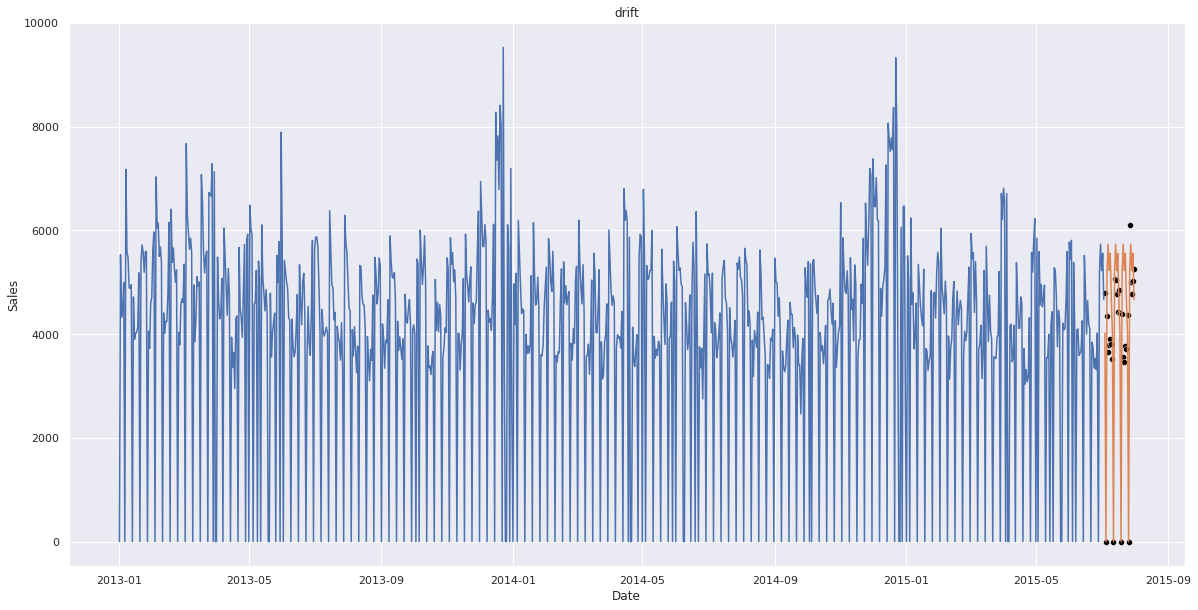

MAE: 	     791.71


In [39]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

forecast = NaiveForecaster(strategy = 'last', sp = 7)
forecast.fit(train['Sales'])

sns.lineplot(data = train['Sales']).set_title('Naive')
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = forecast.predict(fh))
plt.title(strategy)
plt.show()
    
print('MAE: \t %10.2f' % MAE(test['Sales'], forecast.predict(fh)))

#### SARIMA

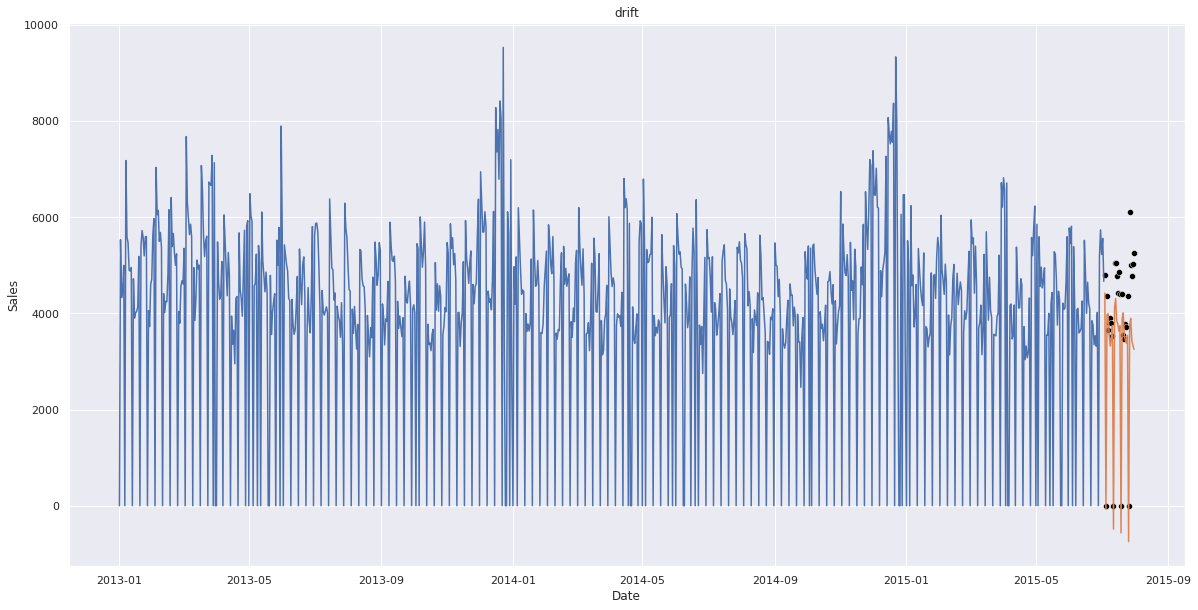

MAE: 	     732.81


In [40]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

'''
arima = AutoARIMA(start_p = 0, d = 0, start_q = 0,
                  max_p = 7, max_d = 2, max_q = 7,
                  seasonal=True,
                  start_P = 0, D = 1, start_Q = 0,
                  max_P = 7, max_D = 2, max_Q = 7,
                  sp = 7,
                  trace=True,
                  error_action='warn',
                  stepwise=True #,
                  #random = True,
                  #n_fits = 20
                  ) 

# Stepwise: Best model:      ARIMA(4,0,0)(7,1,0)[7]
# Non-Stepwise: Best model:  ARIMA(0,0,3)(1,1,1)[7] 
'''

arima = ARIMA(
    order=(0, 0, 3),
    seasonal_order=(1, 1, 1, 7),
    suppress_warnings = True
)

arima.fit(train['Sales'].astype('float'))

sns.lineplot(data = train['Sales']).set_title('Naive')
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = arima.predict(fh))
plt.title(strategy)
plt.show()
    
print('MAE: \t %10.2f' % MAE(test['Sales'], arima.predict(fh)))

#### SARIMAX

##### including holidays

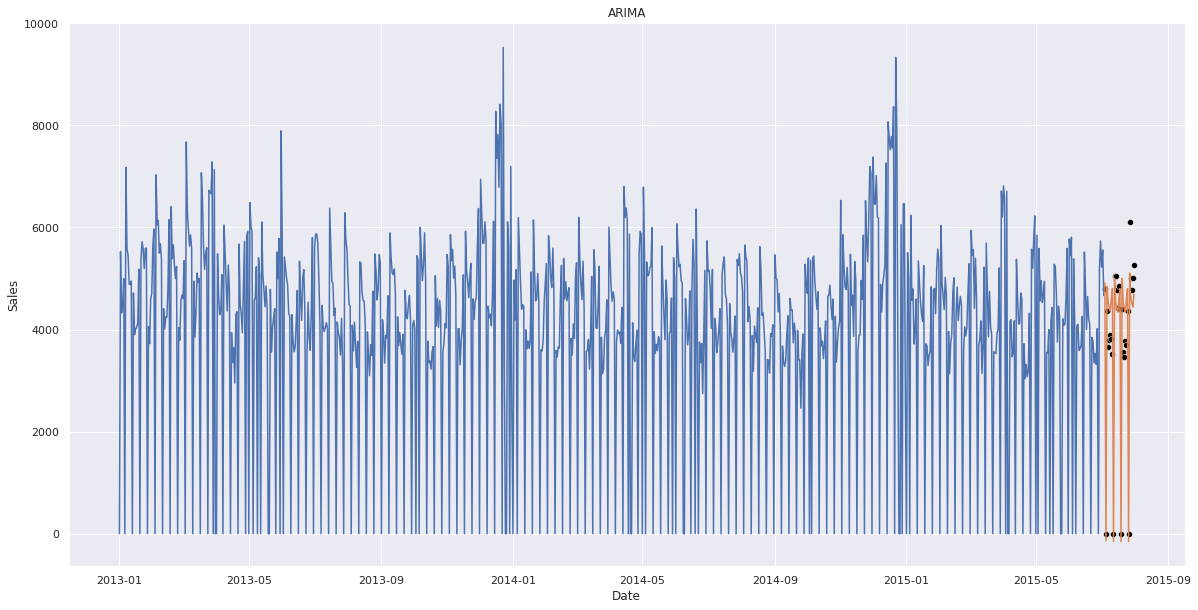

MAE: 	     504.01


In [34]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

data = demand[demand.Store == 1][['Sales', 'StateHoliday', 'SchoolHoliday']]
data['SchoolHoliday'] = data['SchoolHoliday'].replace(to_replace = [True, False], value = [1,0]).astype('int')
data = pd.get_dummies(data, columns = ['StateHoliday'], drop_first = False)
# display(data)

train, test = temporal_train_test_split(data, test_size = 28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

'''
arima = AutoARIMA(start_p = 0, d = 0, start_q = 0,
                  max_p = 7, max_d = 2, max_q = 7,
                  seasonal=True,
                  start_P = 0, D = 1, start_Q = 0,
                  max_P = 7, max_D = 2, max_Q = 7,
                  sp = 7,
                  trace=True,
                  error_action='warn',
                  stepwise=True #,
                  #random = True,
                  #n_fits = 20
                  ) 

# Stepwise: Best model:      ARIMA(4,0,0)(7,1,0)[7]
# Non-Stepwise: Best model:  ARIMA(0,0,3)(1,1,1)[7] 

'''
arima = ARIMA(
    order=(0, 0, 3),
    seasonal_order=(1, 1, 1, 7),
    suppress_warnings = True
)

arima.fit(train['Sales'].astype('float'), X = train.drop(labels = ['Sales'], axis = 'columns'))

sns.lineplot(data = train['Sales'])
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = arima.predict(fh, X = test.drop(labels = ['Sales'], axis = 'columns')))
plt.title('ARIMA')
plt.show()

print('MAE: \t %10.2f' % MAE(test['Sales'], arima.predict(fh, X = test.drop(labels = ['Sales'], axis = 'columns'))))

### Baseline Lineare Regression
#### Lineare Regression

,Sales,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Trend
Date,,,,,,,,,
2013-01-01,0,0,1,0,0,0,0,0,734869
2013-01-02,5530,0,0,1,0,0,0,0,734870
2013-01-03,4327,0,0,0,1,0,0,0,734871
2013-01-04,4486,0,0,0,0,1,0,0,734872
2013-01-05,4997,0,0,0,0,0,1,0,734873
...,...,...,...,...,...,...,...,...,...
2015-07-27,6102,1,0,0,0,0,0,0,735806
2015-07-28,5011,0,1,0,0,0,0,0,735807
2015-07-29,4782,0,0,1,0,0,0,0,735808


,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Trend
Date,,,,,,,,
2013-01-01,0,1,0,0,0,0,0,734869
2013-01-02,0,0,1,0,0,0,0,734870
2013-01-03,0,0,0,1,0,0,0,734871
2013-01-04,0,0,0,0,1,0,0,734872
2013-01-05,0,0,0,0,0,1,0,734873
...,...,...,...,...,...,...,...,...
2015-07-27,1,0,0,0,0,0,0,735806
2015-07-28,0,1,0,0,0,0,0,735807
2015-07-29,0,0,1,0,0,0,0,735808


,Sales
Date,
2013-01-01,0
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
...,...
2015-07-27,6102
2015-07-28,5011
2015-07-29,4782


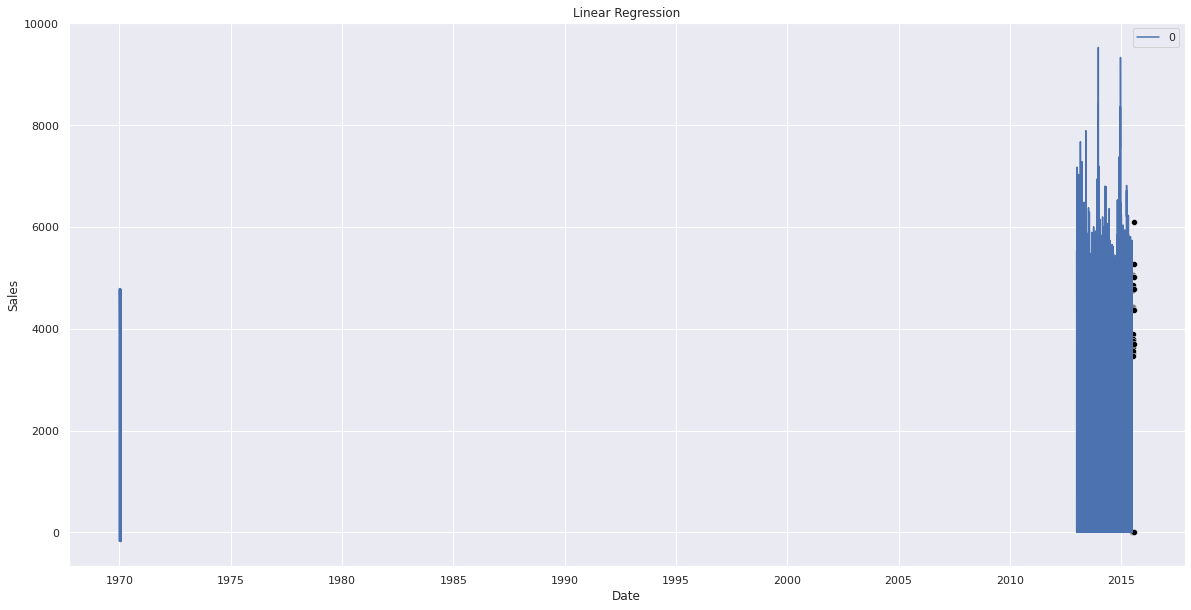

MAE: 	     525.53


"\nforecast = pd.DataFrame(data = reg.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))\nforecast.index.name = 'Date'\nforecast.columns = ['Sales']\n\nfitted = pd.DataFrame(data = reg.predict(x_train), index = pd.date_range(start = x_train.index.min(), end = x_train.index.max()))\nfitted.index.name = 'Date'\nfitted.columns = ['Sales']\n\nsns.scatterplot(x = 'Date', y = 'Sales', data = y_train, color = 'black')\nsns.lineplot(x = 'Date', y = 'Sales', data = fitted)\nplt.show()\nsns.scatterplot(x = 'Date', y = 'Sales', data = y_test, color = 'black')\nsns.lineplot(x = 'Date', y = 'Sales', data = forecast)\nplt.show()\n\ndisplay(mae(y_test['Sales'], forecast['Sales']))\n"

In [44]:
from sklearn.linear_model import LinearRegression
# import datetime as dt

data = demand[demand.Store == 1]

data_reg = data[['Sales', 'DayOfWeek']].copy()
data_reg = pd.get_dummies(data_reg, columns = ['DayOfWeek'], drop_first = False)
data_reg['Trend'] = data.index.map(dt.datetime.toordinal)
    
display(data_reg)

fh = ForecastingHorizon(test.index, is_relative = False)



x = data_reg.drop(columns = ['Sales'])
y = data_reg[['Sales']]

display(x)
display(y)

x_train, x_test = temporal_train_test_split(x, test_size = 28)
y_train, y_test = temporal_train_test_split(y, test_size = 28)

forecast = LinearRegression().fit(x_train, y_train)

sns.lineplot(data = train['Sales'])
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = forecast.predict(x_test))
plt.title('Linear Regression')
plt.show()

print('MAE: \t %10.2f' % MAE(y_test, forecast.predict(x_test)))




'''
forecast = pd.DataFrame(data = reg.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
forecast.index.name = 'Date'
forecast.columns = ['Sales']

fitted = pd.DataFrame(data = reg.predict(x_train), index = pd.date_range(start = x_train.index.min(), end = x_train.index.max()))
fitted.index.name = 'Date'
fitted.columns = ['Sales']

sns.scatterplot(x = 'Date', y = 'Sales', data = y_train, color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = fitted)
plt.show()
sns.scatterplot(x = 'Date', y = 'Sales', data = y_test, color = 'black')
sns.lineplot(x = 'Date', y = 'Sales', data = forecast)
plt.show()

display(mae(y_test['Sales'], forecast['Sales']))
'''